In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# display setting 

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style = "whitegrid")   

In [5]:
# load clean data

data = pd.read_csv(r"C:\Data science work\Projects\Sales Forcasting\data\cleaned_data.csv")

In [6]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11


After operations like

groupby(),
merge(),
reset_index()

pandas does not guarantee rows remain in time order. so Datetime conversion done to tells Python “this is time”.

Even if dates look correct, the rows might be random.

If rows are out of order, the rolling window mixes random weeks instead of consecutive weeks. so here sorting is done to the correct order of time.

After aggregating weekly sales, the Date column was explicitly converted back to datetime 
format to ensure correct time-series plotting and forecasting compatibility.

after grouping the with date some time ut changes its dtpe to object which result in the weriod time series formate so always reconverat for safety

In [ ]:
weekly_sales = data.groupby('Date')["Weekly_Sales"].sum().reset_index()
weekly_sales["Date"] = pd.to_datetime(weekly_sales["Date"]) # Ensure datetime
weekly_sales = weekly_sales.sort_values("Date")  # Ensure time order

# Total Weekly Sales Trend

We first aggregate to company-level weekly sales.

📌 Document Insight Example:

“Sales show recurring spikes toward year-end, indicating strong seasonal demand.”

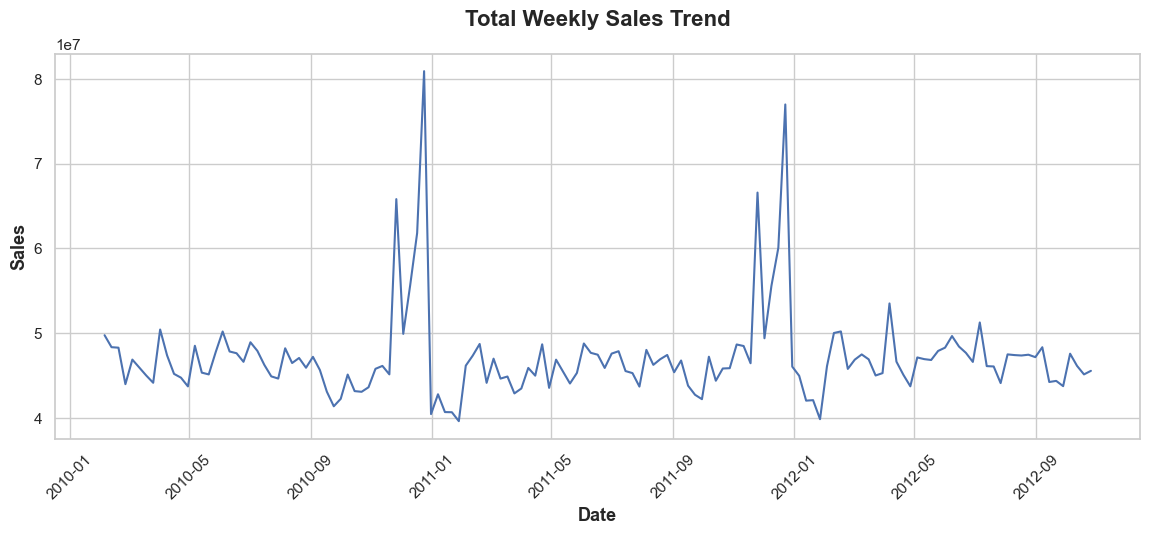

In [116]:

plt.figure(figsize=(14,5))
plt.plot(weekly_sales["Date"], weekly_sales["Weekly_Sales"])

plt.title("Total Weekly Sales Trend",fontsize = 16, pad =20, weight = "bold")
plt.xticks(rotation = 45,)
plt.xlabel("Date", fontsize =13, weight = "bold")                              
plt.ylabel("Sales",fontsize =13, weight = "bold")
plt.show()



# Rolling Average (Trend Smoothing)

This removes noise and shows the underlying trend.

📌 Insight: Helps identify true growth vs random fluctuation

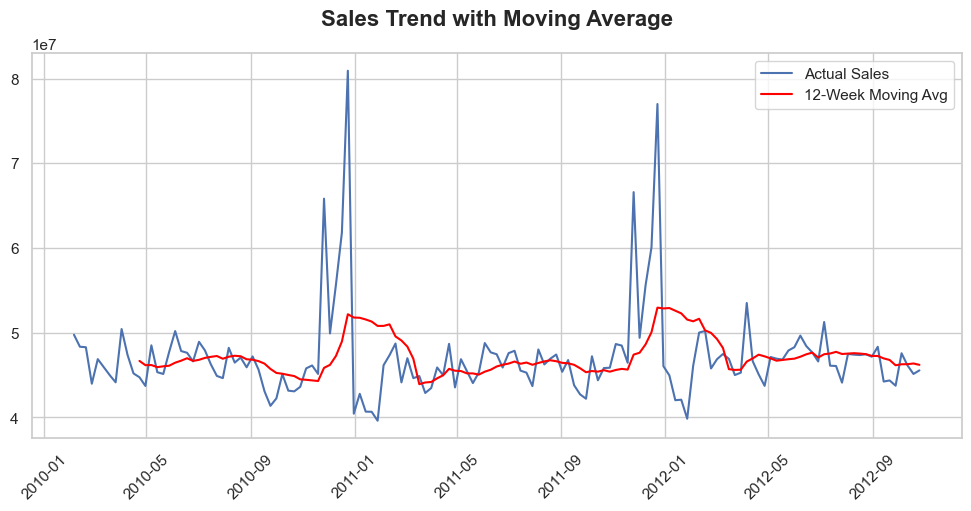

In [77]:

weekly_sales['Rolling_Avg'] = weekly_sales['Weekly_Sales'].rolling(window=12).mean()


plt.figure(figsize=(12,5))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], label='Actual Sales')
plt.plot(weekly_sales['Date'], weekly_sales['Rolling_Avg'], color='red', label='12-Week Moving Avg')
plt.legend()
plt.xticks(rotation=45)
plt.title("Sales Trend with Moving Average",fontsize = 16, pad =20, weight = "bold")
plt.show()


In [56]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11


# Check Seasonality by Month

This shows :
 Which months consistently have higher sales.

meaning :
 Retail businesses usually peak during:

November/December (holidays)

Back-to-school months

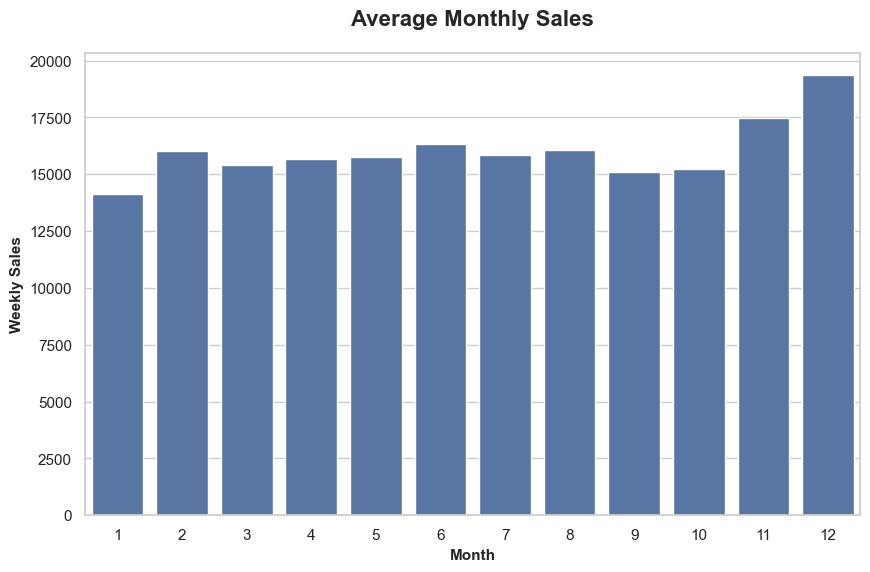

In [84]:
data["Date"] = pd.to_datetime(data["Date"]) # ensure datte coloumn is in datetime formate 

data["Month"] = data["Date"].dt.month #Extracted Month from the Date coloumn

monthly_sales = data.groupby("Month")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize =(10,6))
sns.barplot(data= monthly_sales , x= "Month", y = "Weekly_Sales")
plt.xlabel("Month",fontsize =11, weight = "bold")
plt.ylabel("Weekly Sales",fontsize =11, weight = "bold")
plt.title("Average Monthly Sales", fontsize = 16, pad =20, weight = "bold")
plt.show()

In [85]:
data.head(
    
)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,2
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11,2
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11,2
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11,2
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11,3


# Holiday vs Non-Holiday Sales

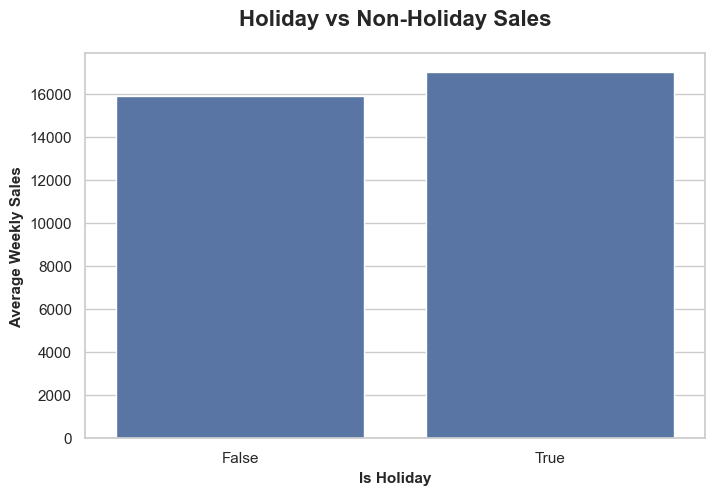

In [90]:
holidays_sales = data.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(8,5))

sns.barplot(data=holidays_sales, x ="IsHoliday", y = "Weekly_Sales")
plt.title("Holiday vs Non-Holiday Sales", fontsize = 16, pad =20, weight = "bold")
plt.xlabel("Is Holiday", fontsize =11, weight = "bold")
plt.ylabel("Average Weekly Sales", fontsize =11, weight = "bold")
plt.show()

# Correlation with External Factors

See if economic or weather conditions influence sales.

Negative relation with unemployment

Slight relation with temperature

Correlation Metrix 
               Weekly_Sales  Temperature  Fuel_Price  Unemployment   CPI
Weekly_Sales          1.00        -0.00       -0.00         -0.03 -0.02
Temperature          -0.00         1.00        0.14          0.10  0.18
Fuel_Price           -0.00         0.14        1.00         -0.03 -0.16
Unemployment         -0.03         0.10       -0.03          1.00 -0.30
CPI                  -0.02         0.18       -0.16         -0.30  1.00


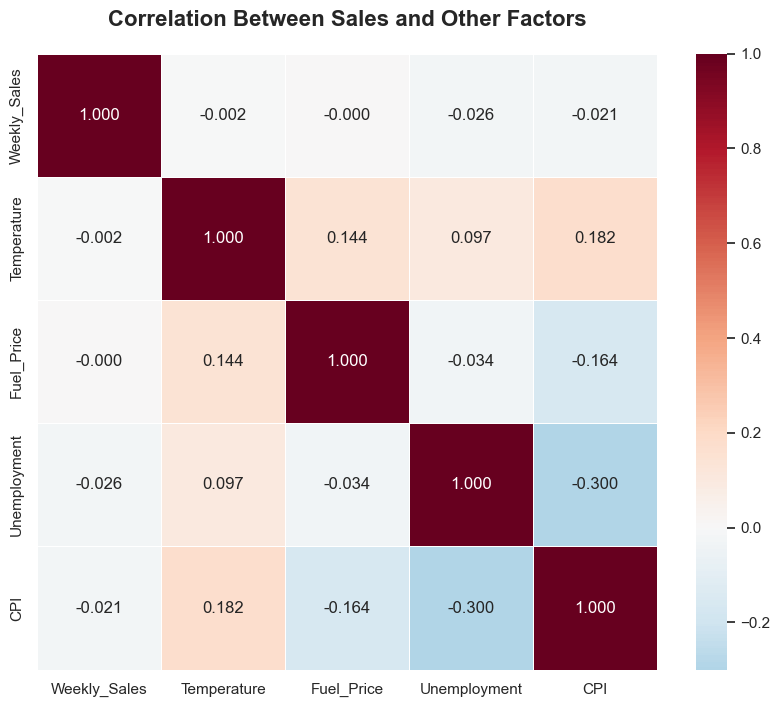

In [113]:
corr_col = ["Weekly_Sales","Temperature","Fuel_Price","Unemployment","CPI"]

correlation = data[corr_col].corr()
print("Correlation Metrix \n",correlation)

plt.figure(figsize=(10,8))

sns.heatmap(correlation, annot = True, cmap="RdBu_r",fmt = ".3f", center =0 , linewidths = 0.5)
plt.title("Correlation Between Sales and Other Factors", fontsize =16 , weight ="bold",pad=20)
plt.show()